# Project: Investigate TMDB movie data

### This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Project Overview

> **Tip**: For this project, i am going to explore **The Movie Database** and derive insights. For example:
<ul>
<li><a href="#Q1">Which movie genre are the most popular ?</a></li>
<li><a href="#Q2">Which casts are the most popular ?</a></li>
<li><a href="#Q3">Correlations</a></li>
<li><a href="#Q4">Which year has the highest number of movie released ?</a></li>
<li><a href="#Q5">Which year made the lowest profit ?</a></li>
<li><a href="#Q6">Which movies had the highest rating by voters ?</a></li>
<li><a href="#Q7">Which movie casts starred in movies with profit above 100,000,000 ?</a></li>
<li><a href="#Q8">Which movie directors directed movies with profit above 100,000,000 ?</a></li>
<li><a href="#Q9">Which movies are the most popular ?</a></li>
</ul>


In [1]:
# Import libraries necessary for project execution.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

UsageError: Line magic function `%` not found.


<a id='wrangling'></a>
## Data Wrangling

Firstly i will be exploring the dataset. By doing this i would understand what the dataset looks like and also note the data i will be keeping for a proper analysis

In [ ]:
# Reading the data

#First load the data and store in the variable "mov"
mov = pd.read_csv('tmdb-movies.csv')

#printing first five rows to have a look
mov.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,06/09/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,04/01/2015,2947,7.3,2015,174799923.1,1.385749e+09


The tmdb dataset contains 10866 rows and 21 columns.

In [ ]:
mov.shape

(10866, 21)

View of datasets to check for correct datatypes, null values, duplicate values

In [ ]:
mov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

## Data Cleaning 


Next i'm going to clean my data, to ensure i have a good and quality data fit for my analysis. 

In [ ]:
#drop the unused columns from the dataset
mov.drop(labels = ['imdb_id','homepage', 'budget_adj', 'revenue_adj'],axis =1,inplace =True)

In [ ]:
mov.shape

(10866, 17)

Next i'm going to remove duplicates and null values if there's any

In [ ]:
#check duplicate values
sum(mov.duplicated())

1

In [ ]:
#drop duplicate values
mov.drop_duplicates(keep= 'first',inplace = True)

In [ ]:
sum(mov.duplicated())

0

>We had a duplicate row, which is now deleted. Now we have no duplicates.

Checking for null values

In [ ]:
# view missing value count for each feature
mov.isnull().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

In [ ]:
# drop rows with any null values in dataset
mov.dropna(inplace=True)

In [ ]:
#confirmation of dropped missing values
mov.isnull().sum().any()

False

In [ ]:
mov.shape

(7031, 17)

In [ ]:
#creating a list for runtime, budget, revenue columns
data_zero = ['runtime','budget','revenue']

#this will replace all the value from '0' to NAN in the list
mov[data_zero] = mov[data_zero].replace(0, np.NAN)

#Removing all the row which has NaN value in the list
mov.dropna(subset = data_zero, inplace = True)

In [ ]:
mov.shape

(3445, 17)

In [ ]:
mov.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3445 entries, 0 to 10848
Data columns (total 17 columns):
id                      3445 non-null int64
popularity              3445 non-null float64
budget                  3445 non-null float64
revenue                 3445 non-null float64
original_title          3445 non-null object
cast                    3445 non-null object
director                3445 non-null object
tagline                 3445 non-null object
keywords                3445 non-null object
overview                3445 non-null object
runtime                 3445 non-null float64
genres                  3445 non-null object
production_companies    3445 non-null object
release_date            3445 non-null object
vote_count              3445 non-null int64
vote_average            3445 non-null float64
release_year            3445 non-null int64
dtypes: float64(5), int64(3), object(9)
memory usage: 484.5+ KB


correcting datatypes

In [ ]:
#convert release_date column datatype from int to datetime
mov['release_date'] = pd.to_datetime(mov['release_date'])

# view changes
mov.dtypes

id                               int64
popularity                     float64
budget                         float64
revenue                        float64
original_title                  object
cast                            object
director                        object
tagline                         object
keywords                        object
overview                        object
runtime                        float64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
dtype: object

In [ ]:
# View the index number and label for each column
for i, v in enumerate(mov.columns):
    print(i, v)

0 id
1 popularity
2 budget
3 revenue
4 original_title
5 cast
6 director
7 tagline
8 keywords
9 overview
10 runtime
11 genres
12 production_companies
13 release_date
14 vote_count
15 vote_average
16 release_year


After cleaning the data, i now have 3445 rows and 17 columns in the dataset

In [ ]:
mov.shape

(3445, 17)

## Summary of data cleaning
> 1. First i dropped these columns **'imdb_id','homepage', 'budget_adj', 'revenue_adj'**. Because they not necessary for my analysis
> 2. Then i removed duplicates, null values.
> 3. Finallly i changed the release_year column datatype from int to datetime.

<a id='eda'></a>
## Exploratory Data Analysis


<a id='Q1'></a>
# 1. Which movie genre are the most popular ?

> For a start i'd like to start my analysis with the columns seperated by | The Genres, Director, Cast, keywords, and production_companies column

>Firstly i am going to create i function to enable me reuse the code anytime i like.


In [ ]:
#function takes in any column then keeps track of it. 
def divide(col_name):
    #this take a column, and separates with '|'
    divide = mov[col_name].str.cat(sep = '|')
    
    #giving pandas series and storing the values separately
    divide = pd.Series(divide.split('|'))
    
    #The result will be in descending order so that the first element is the most frequently-occurring element.
    frequency = divide.value_counts(ascending = False)
    
    return frequency

In [ ]:
#calls the divide function to seperate and store genres in a variable
genres = divide('genres')
#printing values
genres

Drama              1515
Comedy             1199
Thriller           1112
Action             1013
Adventure           698
Crime               593
Romance             566
Science Fiction     497
Horror              436
Family              387
Fantasy             371
Mystery             323
Animation           185
History             112
Music               109
War                 107
Western              48
Documentary          23
Foreign               6
TV Movie              1
dtype: int64

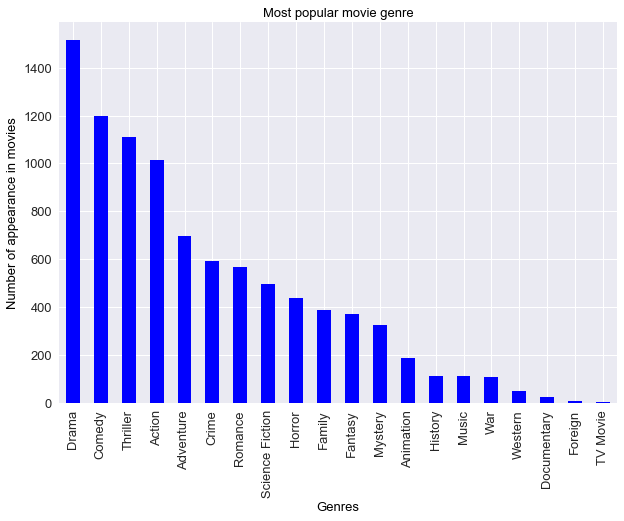

In [ ]:
#plot
g_bar = genres.plot.bar(color = 'blue', fontsize = 13)

#figure size(width, height)
g_bar.figure.set_size_inches(10, 7);

#Add labels
plt.title('Most popular movie genre', color = 'black', fontsize = '13')
plt.xlabel('Genres', color = 'black', fontsize = '13')
plt.ylabel('Number of appearance in movies', color = 'black', fontsize = '13');

As we can see, our visualization shows Drama is the most popular genre by with 1515 appearances.

<a id='Q2'></a>
# 2. Which casts are the most popular ?

In [ ]:
#calls the divide function to seperate and store cast in a variable
cast = divide('cast')
#printing top 10 value
Top10_cast = cast.head(10)

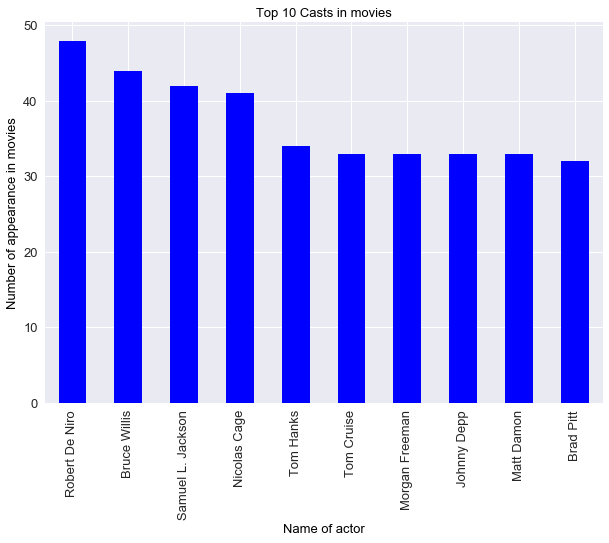

In [ ]:
#plot
c_bar = Top10_cast.plot.bar(color = 'blue', fontsize = 13)

#figure size(width, height)
c_bar.figure.set_size_inches(10, 7);

#Add labels
plt.title('Top 10 Casts in movies', color = 'black', fontsize = '13')
plt.xlabel('Name of actor', color = 'black', fontsize = '13')
plt.ylabel('Number of appearance in movies', color = 'black', fontsize = '13');

>As we can see, our visualization shows Robert De Niro has the highest number of appearance in our dataset.

In [ ]:
#calls the divide function to seperate and store director in a variable
director = divide('director')
#printing top5 values
director.head(5)

Steven Spielberg     27
Ridley Scott         20
Clint Eastwood       20
Steven Soderbergh    17
Tim Burton           17
dtype: int64

>Steven Spielberg directed most movies by directing 27 movies.

In [ ]:
#calls the divide function to seperate and store keywords in a variable
keywords = divide('keywords')
#printing values
keywords.head()

based on novel          159
duringcreditsstinger     96
dystopia                 95
sex                      82
new york                 73
dtype: int64

>'based on novel' is the most popular keyword in the dataset.

<a id ='Q3'></a>
# 3. Correlations

#### Correlation between Runtime vs Popularity

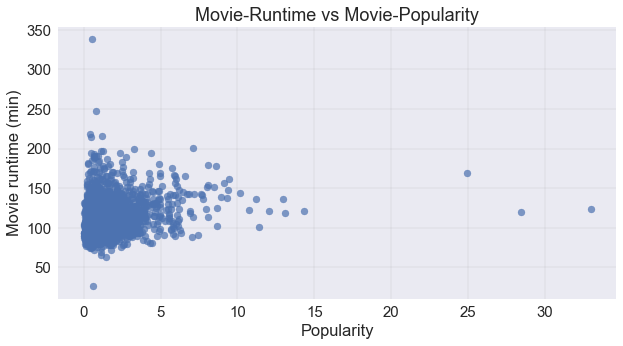

In [ ]:
def scatterplot(mov, xz, yz):
  x = mov[xz]
  y = mov[yz]
  fig, ax = plt.subplots(figsize=(10, 5))

  #customizes alpha for each dot in the scatter plot
  ax.scatter(x, y, alpha=0.70)
 
 
  #adds a title and axes labels
  ax.set_title('Movie-Runtime vs Movie-Popularity')
  ax.set_xlabel('Popularity')
  ax.set_ylabel('Movie runtime (min)')
 
  #removing top and right borders
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)

  #adds major gridlines
  ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
  plt.show()
scatterplot(mov, 'popularity', 'runtime')

In [ ]:
mov['popularity'].corr(mov['runtime'])

0.22591183888860525

>The above scatter plot shows there is a weak positive correlation between Movie runtime and Movie popularity

## I'll also like to know the correlations between the Profit made from the movie and other features like budget, runtime.

In [ ]:
#I have to create a column for profit made
mov['mov_profit'] = mov['revenue'] - mov['budget'] 

mov.head(1)

,id,popularity,budget,revenue,original_title,cast,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,mov_profit
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.363529e+09


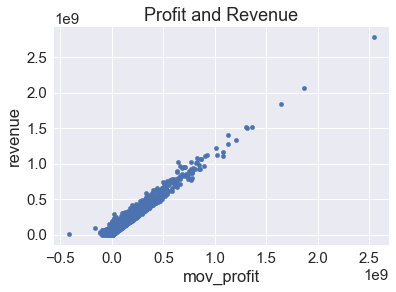

In [ ]:
# Correlation between profit and revenue
mov.plot(x='mov_profit', y='revenue', kind='scatter', title = 'Profit and Revenue');

In [ ]:
mov['mov_profit'].corr(mov['revenue'])

0.9794741771752665

>The above scatter plot shows there is a strong positive correlation between Movie Profit and Revenue.

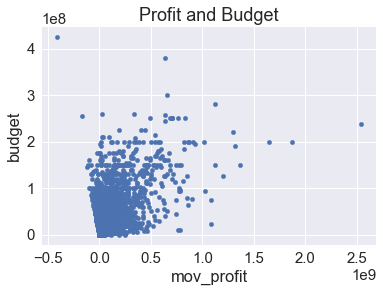

In [ ]:
# Correlation between profit and budget
mov.plot(x='mov_profit', y='budget', kind='scatter', title = 'Profit and Budget');

In [ ]:
mov['mov_profit'].corr(mov['budget'])

0.523098272670375

>The above scatter plot shows there is a weak positive correlation between Movie Profit and budget.

<a id='Q4'></a>
# 4. Which year has the highest number of movie released ?

In [ ]:
# Group by year then count the number of movies.
year_movie = mov.groupby('release_year')['original_title'].count()
year_movie.head()

release_year
1960    4
1961    9
1962    7
1963    6
1964    7
Name: original_title, dtype: int64

In [ ]:
#shows the year with the highest movie released
year_movie.idxmax()

2011

In [ ]:
#shows the year with the lowest movie released
year_movie.idxmin()

1960

In [ ]:
#shows the number of movies produced in year 2011 
year_movie[2011]

178

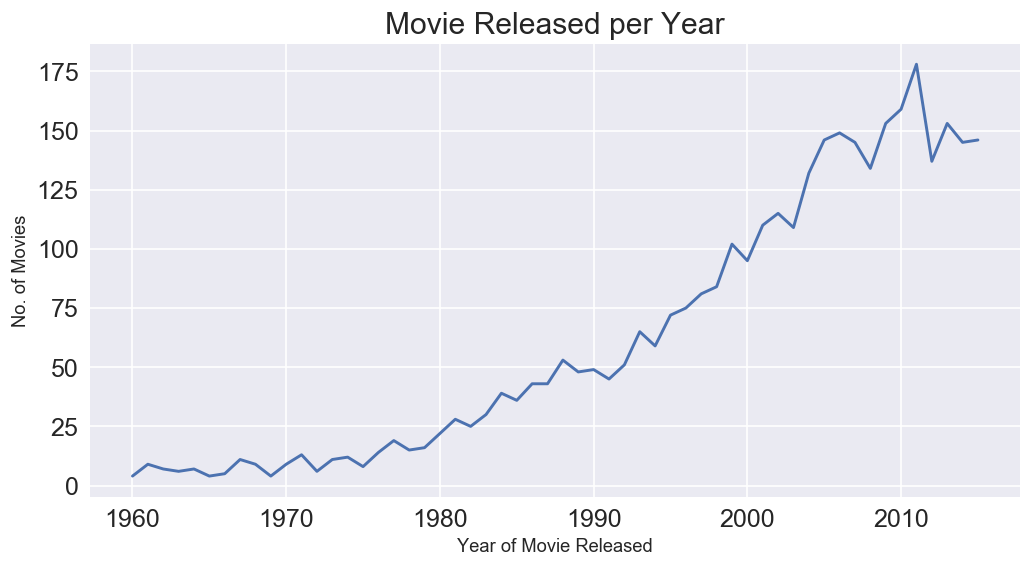

In [ ]:
# Figure size(width, height)
plt.figure(figsize=(10,5), dpi = 120)

# x-axis
plt.xlabel('Year of Movie Released', fontsize = 11)
# y-axis
plt.ylabel('No. of Movies', fontsize = 11)
# Title
plt.title('Movie Released per Year')

# Plot Line chart
plt.plot(year_movie)

# Display plot
plt.show()

>The above plot shows there is a yearly increase in movie produced, with year 2011 showing the highest movie produced. And after 2011 there was a significant drop in movie produced.

<a id='Q5'></a>
# 5. Which year made the highest and lowest profit ?

In [ ]:
# Group by year then sum the profit.
profit_per_year = mov.groupby('release_year')['mov_profit'].sum()

In [ ]:
# Which year made the lowest profit
profit_per_year.idxmin()

1966

In [ ]:
# Amount of profit made
profit_per_year[2015]

18888111122.0

In [ ]:
#Amount of profit made
profit_per_year[1966]

52468689.0

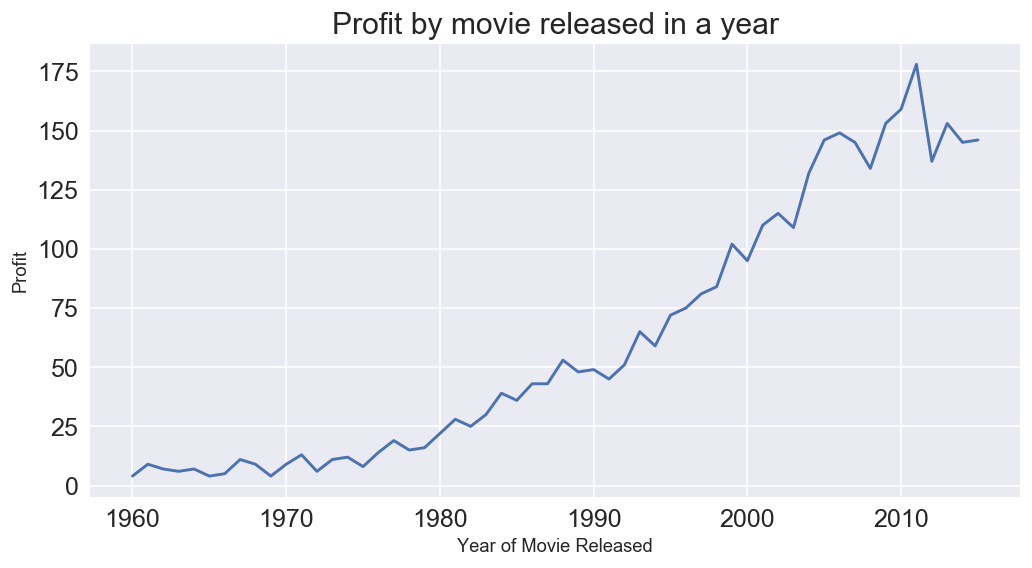

In [ ]:
# Figure size(width, height)
plt.figure(figsize=(10,5), dpi = 120)

# x-axis
plt.xlabel('Year of Movie Released', fontsize = 11)
# y-axis
plt.ylabel('Profit', fontsize = 11)
# Title
plt.title('Profit by movie released in a year')

# Plot Line chart
plt.plot(year_movie)

# Display plot
plt.show()

>The above plot shows 2015 made the highest profit in movie production.

### I'll like to explore the users votes / ratings

<a id='Q6'></a>
# 6. Which movies had the highest rating by voters ?

In [ ]:
# Grab the list of top10 movies
voters = mov.nlargest(10,'vote_average')
voters_top10 = voters.loc[:,['original_title', 'vote_average']].head(10)
voters_top10

,original_title,vote_average
4178,The Shawshank Redemption,8.4
7948,Stop Making Sense,8.4
7269,The Godfather,8.3
650,Whiplash,8.2
2409,Fight Club,8.1
2875,The Dark Knight,8.1
4177,Pulp Fiction,8.1
4179,Forrest Gump,8.1
9758,The Godfather: Part II,8.1
10222,Schindler's List,8.1


### Now let's visualize our results

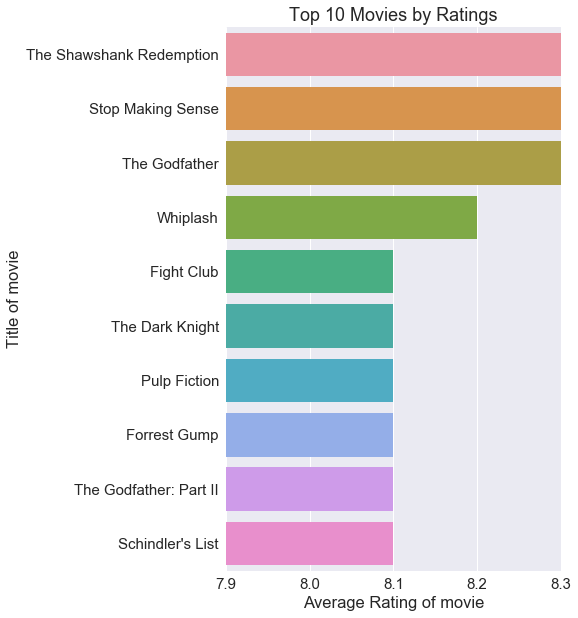

In [ ]:
#Plot the top 10 movies
sns.set(font_scale=1.5);
f, ax = plt.subplots(figsize=(6, 10));
ax = sns.barplot(x='vote_average', y='original_title', data=voters_top10);

ax.set(xlim=(7.9,8.3), ylabel="Title of movie", xlabel="Average Rating of movie");
plt.title('Top 10 Movies by Ratings');

### Next i'll like to know the casts and directors associated with movies with high profits.

<a id='Q7'></a>
# 7. Which movie casts starred in movies with profit above 100,000,000 ?

In [ ]:
#view stats for the profit
mov['mov_profit'].describe()

count    3.445000e+03
mean     7.728538e+07
std      1.566462e+08
min     -4.139124e+08
25%     -1.612180e+05
50%      2.449276e+07
75%      9.282072e+07
max      2.544506e+09
Name: mov_profit, dtype: float64

Looking at this if 75% of movie profit fall below 9.282072e+07 and the max is 2.544506e+09 then we can say the movie that made substantial profit from a movie ranges from 100,000,000 and above. 

In [ ]:
# Creates new dataframe to filter movies that made above 100,000,000
high_profit_mov = mov[mov['mov_profit'] >= 100000000]
high_profit_mov.head(2)

,id,popularity,budget,revenue,original_title,cast,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,mov_profit
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.363529e+09
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,2.284364e+08


In [ ]:
def high_mov_profit(column_name):

    data = high_profit_mov[column_name].str.cat(sep = '|')
    
    # Create pandas series and store the values separately
    data = pd.Series(data.split('|'))
    
    # Display value count in descending order
    count = data.value_counts(ascending = False)
    
    return count

In [ ]:
#returns top 10 cast associated with profitable movies
cast_profit = high_mov_profit('cast')
cast_profit10 = cast_profit.head(10)
cast_profit10

Tom Cruise            23
Tom Hanks             19
Brad Pitt             18
Will Smith            16
Cameron Diaz          16
Adam Sandler          16
Sylvester Stallone    16
Bruce Willis          14
Samuel L. Jackson     14
Robin Williams        13
dtype: int64

> Tom Cruise tops the list, which means he featured in 23 movies that made above 100,000,000 in profit. 

Having this knowledge puts movies who feature Tom Cruise in a good position. 

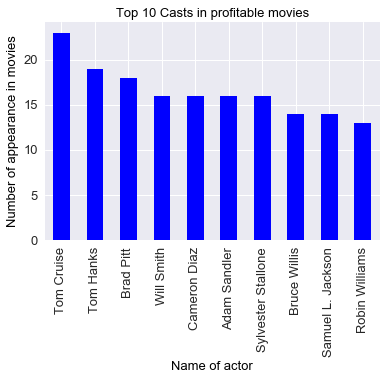

In [ ]:
#plot
cp_bar = cast_profit10.plot.bar(color = 'blue', fontsize = 13)

#figure size(width, height)
c_bar.figure.set_size_inches(10, 7);

#Add labels
plt.title('Top 10 Casts in profitable movies', color = 'black', fontsize = '13')
plt.xlabel('Name of actor', color = 'black', fontsize = '13')
plt.ylabel('Number of appearance in movies', color = 'black', fontsize = '13');

<a id='Q8'></a>
# 8. Which movie directors directed movies with profit above 100,000,000 ?

In [ ]:
#returns top 10 directors associated with profitable movies
director_profit = high_mov_profit('director')
director_profit10 = director_profit.head(10)
director_profit10

Steven Spielberg      21
Robert Zemeckis        9
Michael Bay            8
Ridley Scott           7
David Fincher          7
M. Night Shyamalan     7
Peter Jackson          7
Tim Burton             7
Quentin Tarantino      7
Roland Emmerich        7
dtype: int64

> Steven Spielberg tops the list, which means he directed 21 movies that made above 100,000,000 in profit. 

Having this knowledge puts any movie that Steven Spielberg directs in a good position. 

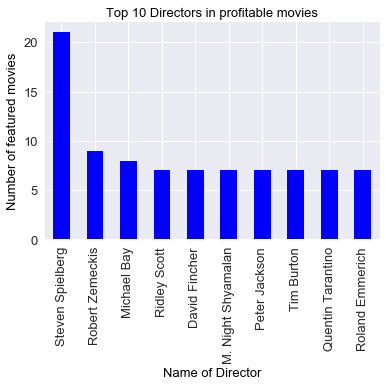

In [ ]:
#plot to show top 10 directors
dp_bar = director_profit10.plot.bar(color = 'blue', fontsize = 13)

#figure size(width, height)
c_bar.figure.set_size_inches(10, 7);

#Add labels
plt.title('Top 10 Directors in profitable movies', color = 'black', fontsize = '13')
plt.xlabel('Name of Director', color = 'black', fontsize = '13')
plt.ylabel('Number of featured movies', color = 'black', fontsize = '13');

<a id='Q9'></a>
# 9. Which movies are the most popular ?

In [ ]:
# Group by year then sum the popularity.
mov_popularity = mov.groupby('original_title')['popularity'].sum()
top10_mp = mov_popularity.nlargest(10)
top10_mp

original_title
Jurassic World                           32.985763
Mad Max: Fury Road                       28.419936
Interstellar                             24.949134
Guardians of the Galaxy                  14.311205
Insurgent                                13.112507
Captain America: The Winter Soldier      12.971027
Star Wars                                12.037933
John Wick                                11.422751
Star Wars: The Force Awakens             11.173104
The Hunger Games: Mockingjay - Part 1    10.739009
Name: popularity, dtype: float64

>Now we know the movie Jurassic World is the most popular movie in the dataset.

<a id='conclusions'></a>
# Conclusions

> It's been interesting analyzing the The Movie Database (TMDb).

> My findings are:

1. From the year 1960 to 2015: Drama was produced more than any other movie genre. Next Comedy.
<br/><br/>

2. Next we had a look at the most popular cast. Robert De Niro tops that list.
<br/><br/>
3. Then i had a look at the possible correlations. Profit and Revenue especially had a strong positive correlation.
<br/><br/>
4. I checked the yearly trend in movie production, and noticely a yearly increase in the trend. It also featured year 2011 which is the year with the highest number of movie released with 178 movies produced. While year 1960 had the lowest.
<br/><br/>
5. I also viewed the yearly trend in profit made from movies. Which shows year 2015 made the highest profit in movie production.
<br/><br/>
6. I viewed the movie that has the highest ratings by voters. The movie 'The Shawshank Redemption' had a whooping 8.4 rating by voters making it the highest rated movie. It was really liked by people who watched it.
<br/><br/>
7. I got so curious to know which casts featured in profitable movies. To achieve this, i analyzed to check movies which made above 100,000,000 in profit and also the casts that featured in them. Tom Cruise tops the list, which means he featured in 23 movies that made above 100,000,000 in profit. This tells us a lot about his ratings and why anyone with a really good story has a good chance of making a profit in movie if he/she features Tom Cruise in it.
<br/><br/>
8. Next we did the same for director. I wanted to know which director featured in profitable movies. To achieve this, i analyzed to check movies which made above 100,000,000 in profit and also the directors that featured in them. Steven Spielberg tops the list, which means he directed 21 movies that made above 100,000,000 in profit.
<br/><br/>
9. Finally the movie 'Jurassic World' topped the list of most popular movie.


## Limitations
> The biggest limitation i had was because i had to drop so many rows because they were filled with missing values, if they weren't they might have aided my analysis.

>And i also noticed columns like budget and revenue had no currency unit. I feel difffernt movies might have a budget with different currency unit based on the country they produced the movie.

>A column for award received would've aided the analysis too, especially those relating to cast.